Universidad del Valle de Guatemala<br>Facultad de Ingeniería<br>Departamento de Ciencias de la Computación<br>Inteligencia Artificial<br><br>
Ma. Isabel Solano Bonilla 20504

# Laboratorio de Reposición 

## Instrucciones
Esta actividad debe realizarse individualmente.
- No se permitirá ni se aceptará cualquier indicio de copia. De presentarse, se procederá según el reglamento correspondiente.
- Tendrán hasta la fecha indicada en Canvas para entregar este laboratorio.
    - No se confíen, aprovechen el tiempo en clase para entender todos los ejercicios y avanzar lo más posible.

## Task 1
Instrucciones: Usted usará Python a través de un Jupyter Notebook para llevar a cabo este ejercicio. Recuerde utilizar comentarios para describir lo que está haciendo en cada parte del proceso. Estará usando el juego de datos proporcionado dentro del portal. Al finalizar recuerde subir al portal un link a su repositorio en el que se pueda correr su notebook, usando https://mybinder.org/. <br><br>
El juego de datos proporcionado es parte de la plataforma Kaggle, dentro del cual se muestran condiciones físicas y contextuales para más de 4000 pacientes de enfermedades cardíacas. El dataset relaciona a cada paciente con una etiqueta (1 = tuvo un paro cardíaco, 0 = no tuvo paro cardíaco).<br><br>
Abajo una breve descripción de las variables incluidas:
- Demographic:
    - Sex: male or female(Nominal)
    - Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
- Behavioral:
    - Current Smoker: whether or not the patient is a current smoker (Nominal)
    - Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
    - Medical( history)
    - BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    - Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    - Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    - Diabetes: whether or not the patient had diabetes (Nominal)
- Medical(current)
    - Tot Chol: total cholesterol level (Continuous)
    - Sys BP: systolic blood pressure (Continuous)
    - Dia BP: diastolic blood pressure (Continuous)
    - BMI: Body Mass Index (Continuous)
    - Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    - Glucose: glucose level (Continuous)
<br>
Para este ejercicio se le pide que proporcione un modelo de regresión logística polinomial que prediga fielmente si
un paciente sufrirá de un paro cardíaco.

## Task 1.1
Leer el archivo CSV proporcionado y almacenarlo en un np.array para ser trabajado en el notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/framingham.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Ahora haremos un pequeño análisis exploratorio antes de realizar la regresión

In [2]:
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

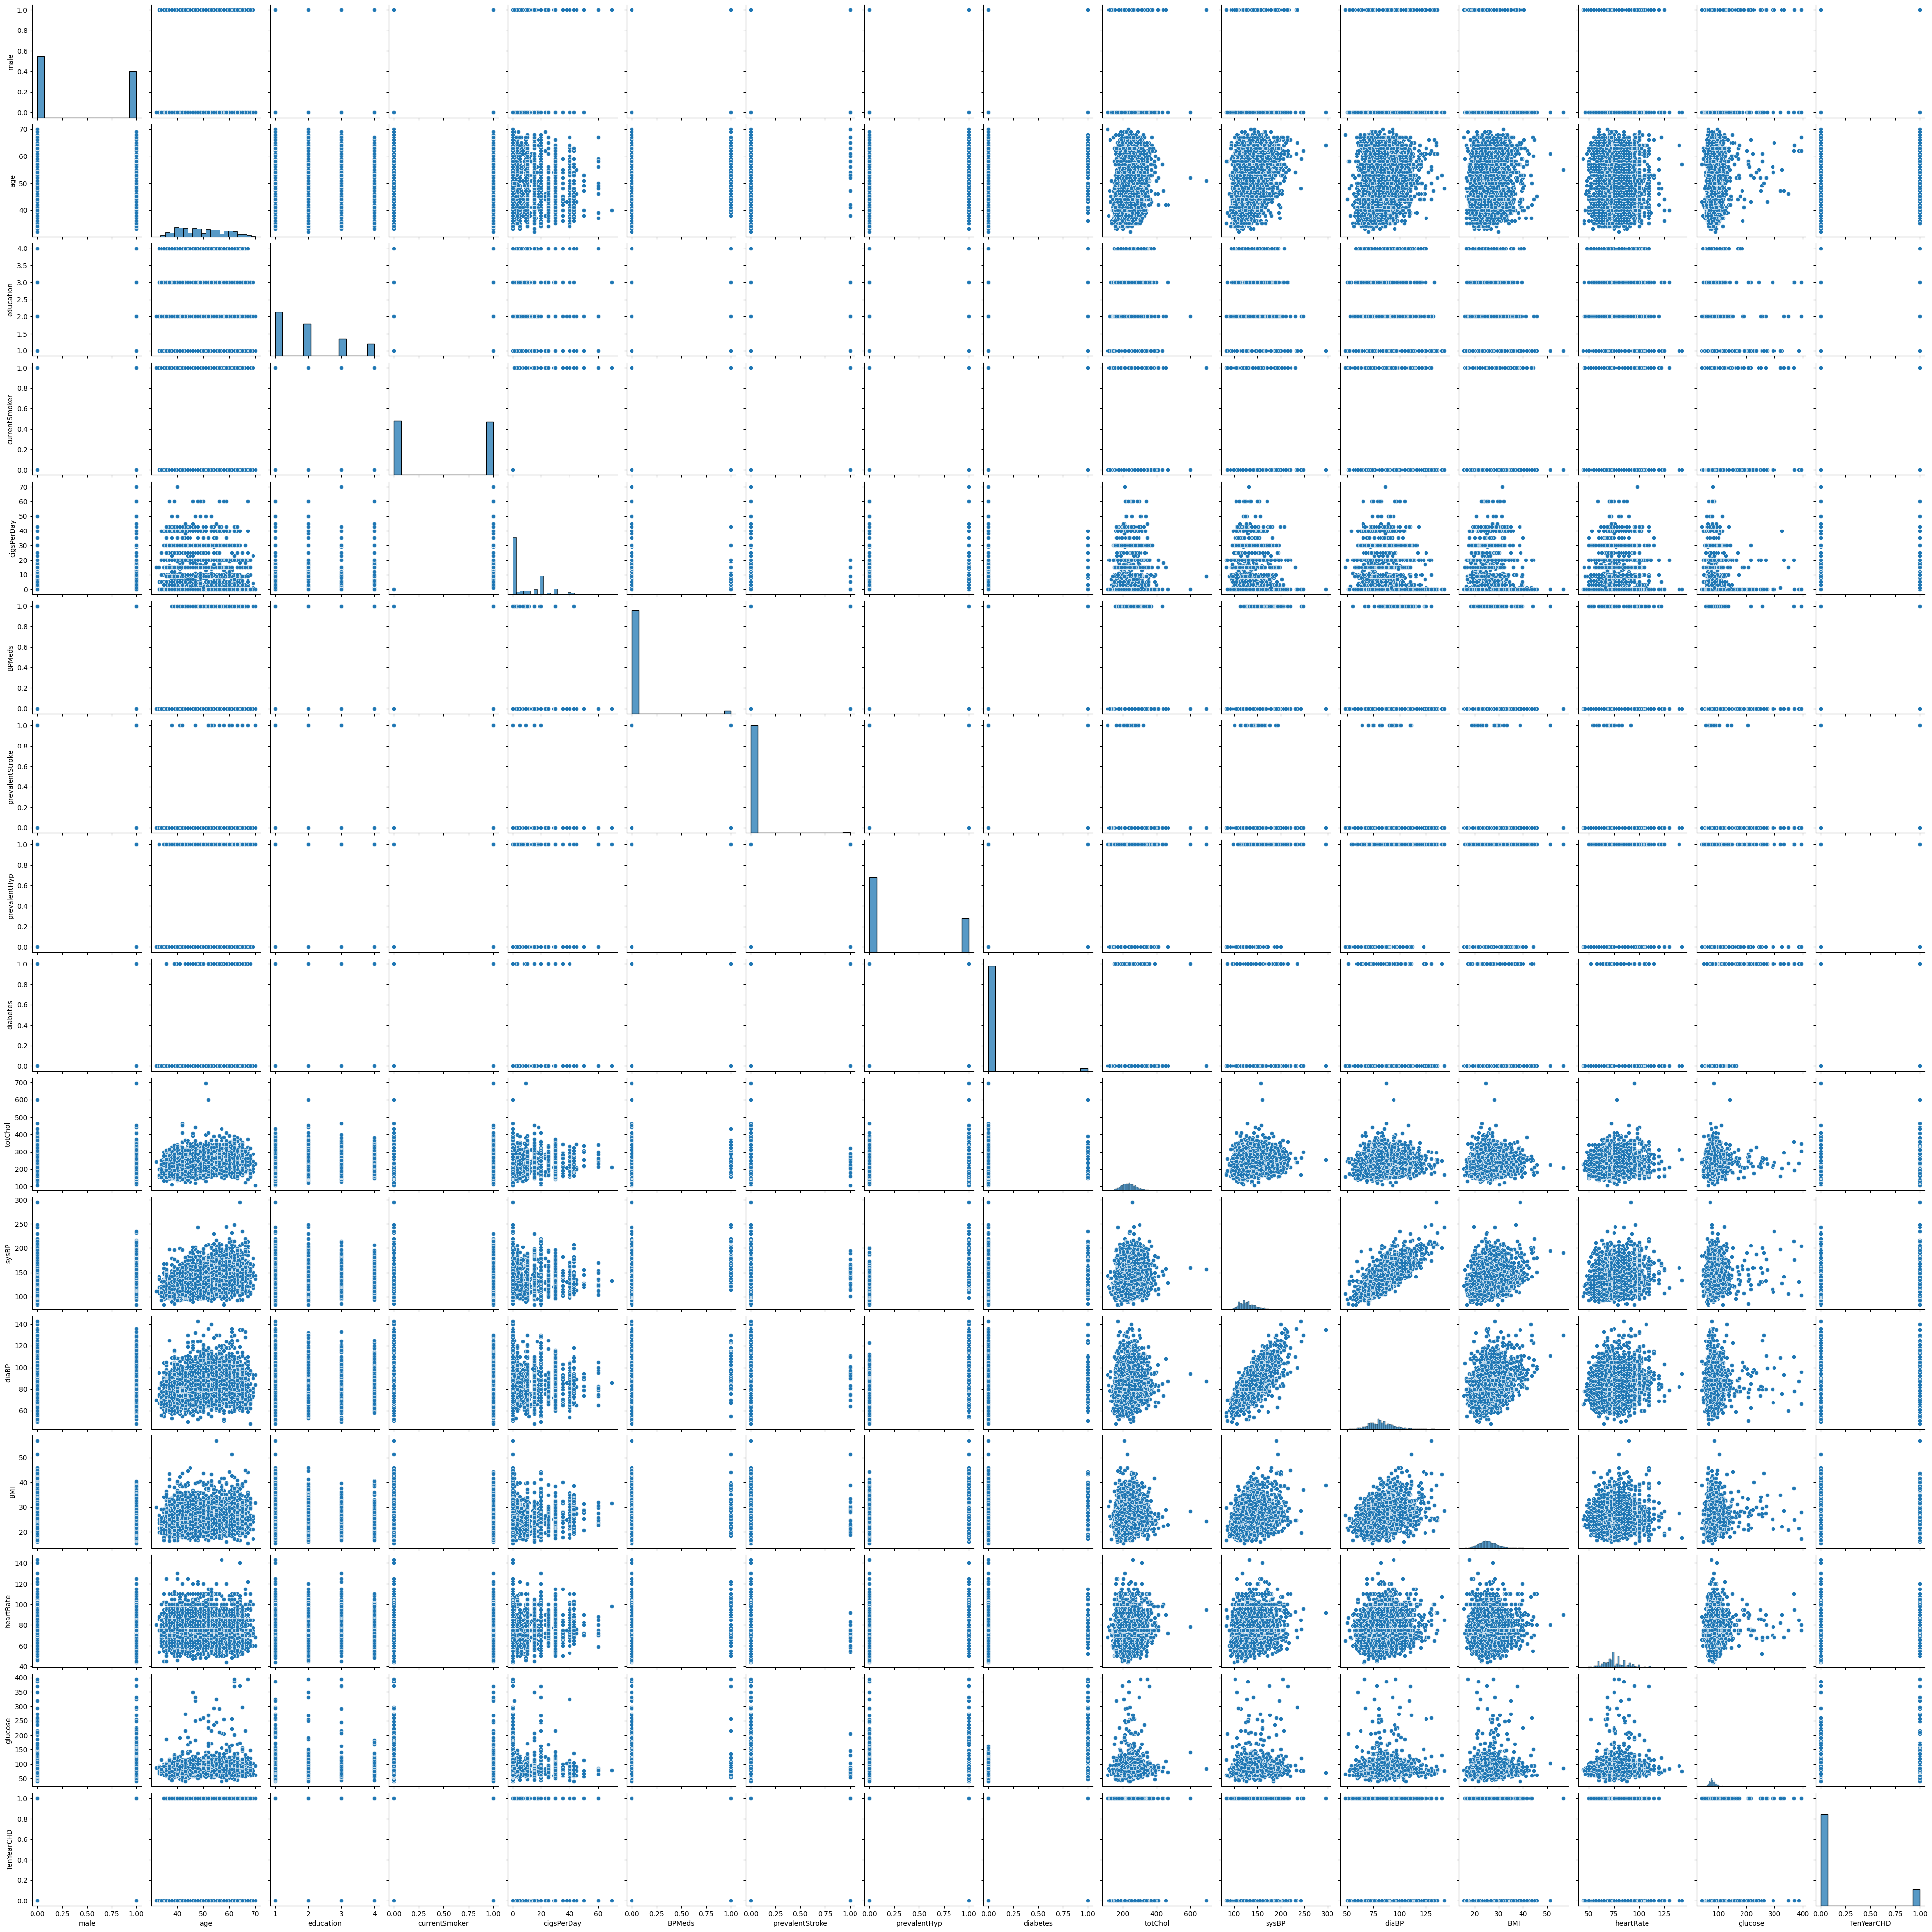

In [3]:
sns.pairplot(df)

In [6]:
import ydata_profiling
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

A patir de este análisis de perfil podemos saber que:
- Columnas con datos faltantes:
    - Education [105 (2.5%)]
    - cigsPerDay [29 (0-7%)]
    - BPMeds [53 (1-3%)]
    - totChol [50 (1.2%)]
    - BMI [19 (0.4%)]
    - heartRate [1 (< 0.1%)]
    - glucose [388 (9.2%)]
- Altas correlaciones
    - cigsPerDay
    - Diabetes
- No balanceadas 
    - BPMeds
    - Diabetes

<AxesSubplot: >

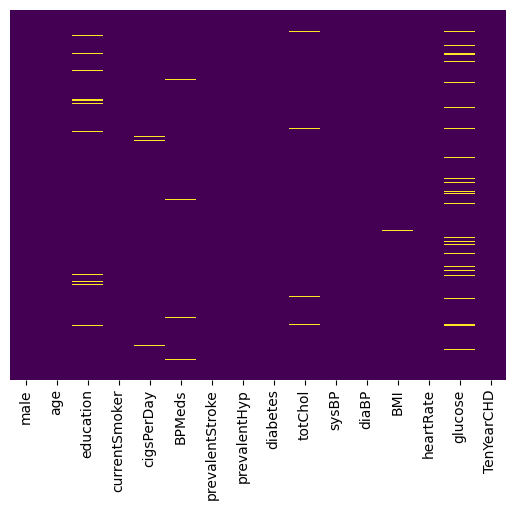

In [9]:
# Datos faltantes
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [10]:
df.glucose

0        77.0
1        76.0
2        70.0
3       103.0
4        85.0
        ...  
4233     86.0
4234     68.0
4235     86.0
4236      NaN
4237    107.0
Name: glucose, Length: 4238, dtype: float64

In [19]:
# df[['cigsPerDay', 'currentSmoker']]
df[df['cigsPerDay'].isnull()]

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
131      1   43        4.0              1         NaN     0.0   
139      1   49        4.0              1         NaN     0.0   
1046     0   49        1.0              1         NaN     0.0   
1292     1   42        3.0              1         NaN     0.0   
1347     0   58        4.0              1         NaN     0.0   
1451     1   54        1.0              1         NaN     0.0   
1497     1   55        1.0              1         NaN     0.0   
1610     0   61        1.0              1         NaN     0.0   
1625     0   49        2.0              1         NaN     0.0   
1870     0   47        2.0              1         NaN     0.0   
1963     1   45        3.0              1         NaN     0.0   
1980     0   60        2.0              1         NaN     0.0   
2405     0   49        1.0              1         NaN     0.0   
2513     1   42        1.0              1         NaN     0.0   
2542     1   57        NaN              1         NaN     0.0   
3021     1   53        2.0              1         NaN     0.0   
3034     0   57        NaN              1         NaN     0.0   
3094     0   49        1.0              1         NaN     0.0   
3106     0   47        3.0              1         NaN     0.0   
3108     1   39        2.0              1         NaN     0.0   
3156     1   37        3.0              1         NaN     0.0   
3177     1   45        2.0              1         NaN     0.0   
3309     1   58        2.0              1         NaN     0.0   
3432     0   55        1.0              1         NaN     0.0   
3579     1   42        1.0              1         NaN     0.0   
3715     0   57        2.0              1         NaN     0.0   
3847     0   41        1.0              1         NaN     0.0   
3924     0   52        2.0              1         NaN     0.0   
3942     0   39        3.0              1         NaN     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
131                 0             0         0    222.0  109.5   69.0  25.50   
139                 0             0         0    256.0  127.5   81.5  28.21   
1046                0             0         0    280.0  120.0   80.0  22.33   
1292                0             0         0    225.0  122.5   80.0  25.54   
1347                0             1         0    270.0  195.0  117.5  23.35   
1451                0             0         0    219.0  110.0   72.0  26.05   
1497                0             0         0    214.0  132.5   85.5  29.25   
1610                0             1         0    356.0  168.0   98.0  27.30   
1625                0             1         0    233.0  158.0  102.0  25.31   
1870                0             0         0    365.0  127.0   76.0  24.44   
1963                0             1         0    170.0  145.5   99.0  26.74   
1980                0             0         0    228.0  112.0   74.0  24.51   
2405                0             0         0    252.0  123.0   69.0  21.45   
2513                0             0         0    226.0  119.0   80.0  25.29   
2542                0             0         0    223.0  107.5   72.5  24.74   
3021                0             0         0    276.0  130.0   86.0  24.21   
3034                0             0         0    229.0  115.0   69.0  24.43   
3094                0             1         0    214.0  172.0  111.0  40.51   
3106                0             0         0    321.0  132.0   88.0  28.14   
3108                0             0         0    285.0  121.0   82.0  27.62   
3156                0             0         0    188.0  123.5   77.0  26.62   
3177                0             0         0    248.0  121.0   72.0  27.88   
3309                0             0         0    235.0  127.5   76.0  21.02   
3432                0             1         0    213.0  163.0   91.0  28.66   
3579                0             0         0    196.0  123.0   73.0  22.06   
3

In [20]:
# Eliminamos los datos faltantes
df = df.dropna()

In [26]:
# Obtención de X y y
X = df.drop('TenYearCHD', axis = 1).values
y = df['TenYearCHD'].values

In [27]:
X

array([[  1.  ,  39.  ,   4.  , ...,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   2.  , ...,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,   1.  , ...,  25.34,  75.  ,  70.  ],
       ...,
       [  1.  ,  50.  ,   1.  , ...,  25.97,  66.  ,  86.  ],
       [  1.  ,  51.  ,   3.  , ...,  19.71,  65.  ,  68.  ],
       [  0.  ,  52.  ,   2.  , ...,  21.47,  80.  , 107.  ]])

In [28]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [30]:
# Separación de entreno y prueba
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size=0.2, random_state=100)

## Task 1.2, 1.3, 1.4
Ajustar un modelo logístico polinomial en base al juego de datos cargado de forma matricial que relaciona las
variables independientes que usted considere apropiadas (puede no utilizar todas las componentes de X), con la
variable dependiente de salida (sufre o no sufre un paro cardíaco).
<br>
Utilice la implementación vectorial del algoritmo de regresión logística (descenso del gradiente visto en clase).
<br>
Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados

In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [101]:
# Cross validation
k_vals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

cross_val_scores = []

In [102]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

for k in k_vals:
    sel = SelectKBest(f_classif, k=k)
    X_entreno_seleccionados = sel.fit_transform(X_entreno, y_entreno)
    grado = 2
    model = make_pipeline(PolynomialFeatures(grado), LogisticRegression(solver='lbfgs', penalty='l2', C=0.5, max_iter = 500))
    scores = cross_val_score(model, X_entreno_seleccionados, y_entreno, cv=5) 
    cross_val_scores.append(scores.mean())    

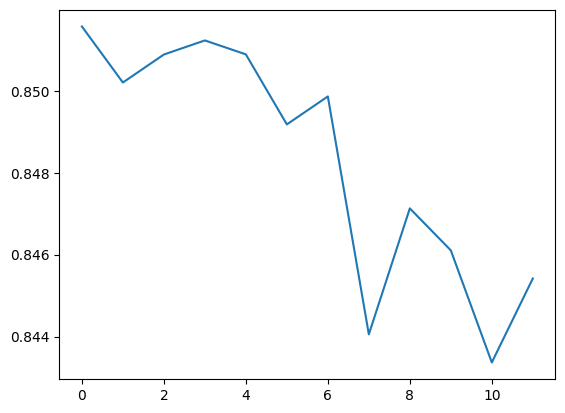

In [103]:
plt.plot(cross_val_scores) 
# np.argmax(cross_val_scores)

In [104]:
k = k_vals[np.argmax(cross_val_scores)]
k

1

In [117]:
sel = SelectKBest(f_classif, k=k)
X_entreno_seleccionados = sel.fit_transform(X_entreno, y_entreno)
X_prueba_seleccionados = sel.transform(X_prueba)
grado = 2
model = make_pipeline(PolynomialFeatures(grado), LogisticRegression(solver='lbfgs', penalty='l2', C=0.5, max_iter = 500))
model.fit(X_entreno_seleccionados, y_entreno)
# model.named_steps['polynomialfeatures'].fit(X_entreno_seleccionados)
y_pred = model.predict(X_prueba_seleccionados)

In [128]:
from sklearn.metrics import accuracy_score, precision_score
accuracy = accuracy_score(y_prueba, y_pred)
p_score = precision_score(y_prueba, y_pred, average='weighted')

print("Accuracy: ", accuracy) 
print("Precision score: ", p_score) 

Accuracy:  0.8265027322404371
Precision score:  0.6872426828355416


In [129]:
from sklearn.metrics import roc_curve, auc
# probabilidades de pertenencia a la clase positiva
y_proba = model.predict_proba(X_prueba_seleccionados)[:, 1]
y_proba

# curva ROC
fpr, tpr, thresholds = roc_curve(y_prueba, y_proba)
roc_auc = auc(fpr, tpr)

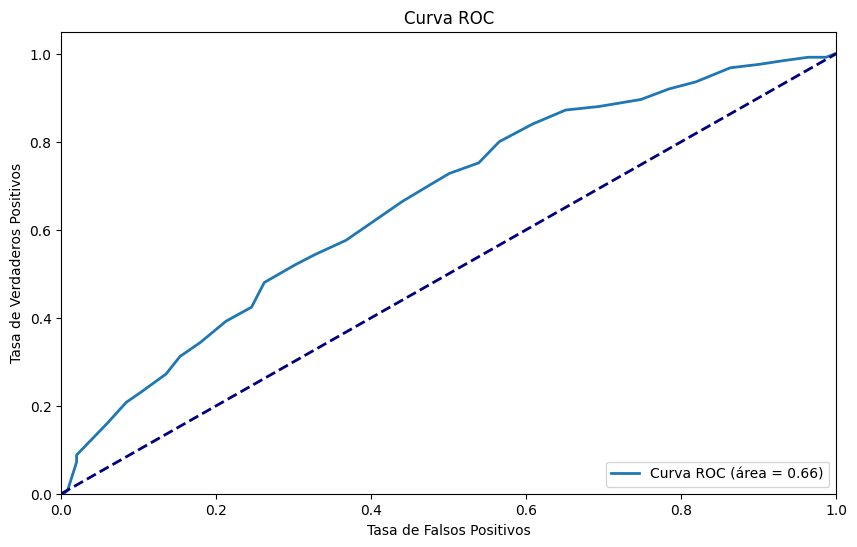

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Task 1.5
Haga un análisis sobre sus hallazgos.